# This is the file for preprocessing the text captions found in the CSV captions_for_8k


In [4]:
#install some dependencies
!pip install nltk wordcloud seaborn requests

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from wordcloud import WordCloud
from PIL import Image


### Now that we have installed dependednices I will now do some EDA on the captions and emotions and then will prepreoccess them now lets do some EDA


In [6]:
df = pd.read_csv("/Volumes/Crucial X6/A3/IML a3/code/preprocessing/captions_for_8k.csv")
print(df.head())

       art_style                                           painting  \
0  Impressionism              gregoire-boonzaier_self-portrait-1969   
1  Impressionism            john-henry-twachtman_view-along-a-river   
2  Impressionism  john-singer-sargent_palazzo-corner-della-ca-gr...   
3    Romanticism               orest-kiprensky_the-family-of-satyrs   
4  Impressionism                   nicolae-grigorescu_clearing-back   

      emotion                                          utterance  repetition  
0     sadness    The man has a lot of wrinkles on his aging face           6  
1         awe  The water reflects everything like a portal to...           6  
2         awe  The beauty of the building puts me into amazem...           6  
3  excitement    The imps playfully dance and sing to the music.           6  
4         awe  The person has a long journey ahead of them th...           6  


In [7]:
print("Total samples:", len(df))
print("Unique captions:", df['utterance'].nunique())
print("\nMissing values:")
print(df.isnull().sum())


Total samples: 34217
Unique captions: 34199

Missing values:
art_style     0
painting      0
emotion       0
utterance     0
repetition    0
dtype: int64


Average caption length: 15.541719028553059
Min: 1
Max: 133


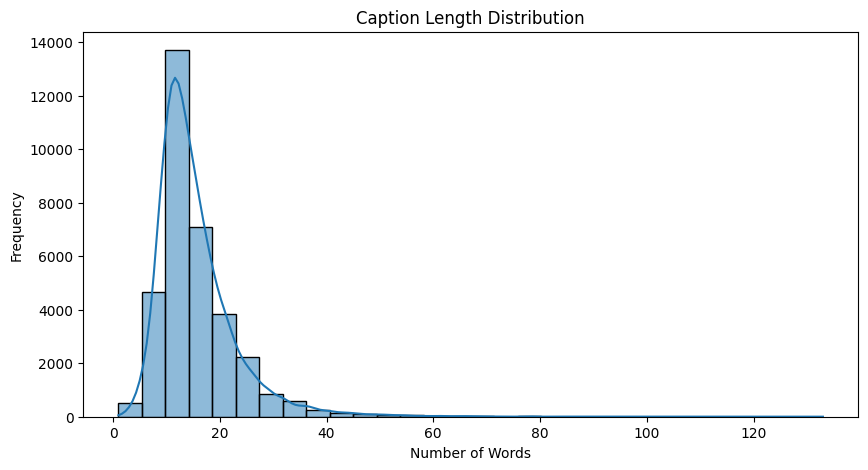

In [8]:
df["caption_length"] = df["utterance"].apply(lambda x: len(str(x).split()))

print("Average caption length:", df["caption_length"].mean())
print("Min:", df["caption_length"].min())
print("Max:", df["caption_length"].max())

plt.figure(figsize=(10,5))
sns.histplot(df["caption_length"], bins=30, kde=True)
plt.title("Caption Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [9]:
#some packages for tokenizing
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/manasvenkatasairavulapalli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/manasvenkatasairavulapalli/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manasvenkatasairavulapalli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
stop_words = set(stopwords.words("english"))

def tokenize(text):
    return [w.lower() for w in word_tokenize(text) if w.isalpha()]

df["tokens"] = df["utterance"].apply(tokenize)

all_words = [w for tokens in df["tokens"] for w in tokens]
filtered_words = [w for w in all_words if w not in stop_words]

word_freq = Counter(filtered_words).most_common(30)

word_freq


[('like', 8700),
 ('looks', 6734),
 ('painting', 3716),
 ('colors', 3573),
 ('look', 3555),
 ('makes', 3374),
 ('feel', 3309),
 ('man', 3005),
 ('woman', 2866),
 ('make', 1731),
 ('people', 1672),
 ('seems', 1635),
 ('face', 1633),
 ('dark', 1517),
 ('scene', 1446),
 ('color', 1278),
 ('beautiful', 1261),
 ('blue', 1250),
 ('looking', 1249),
 ('picture', 1209),
 ('sad', 1115),
 ('white', 1102),
 ('love', 1079),
 ('bright', 1057),
 ('sky', 1051),
 ('red', 1039),
 ('way', 1036),
 ('something', 1035),
 ('water', 979),
 ('background', 976)]

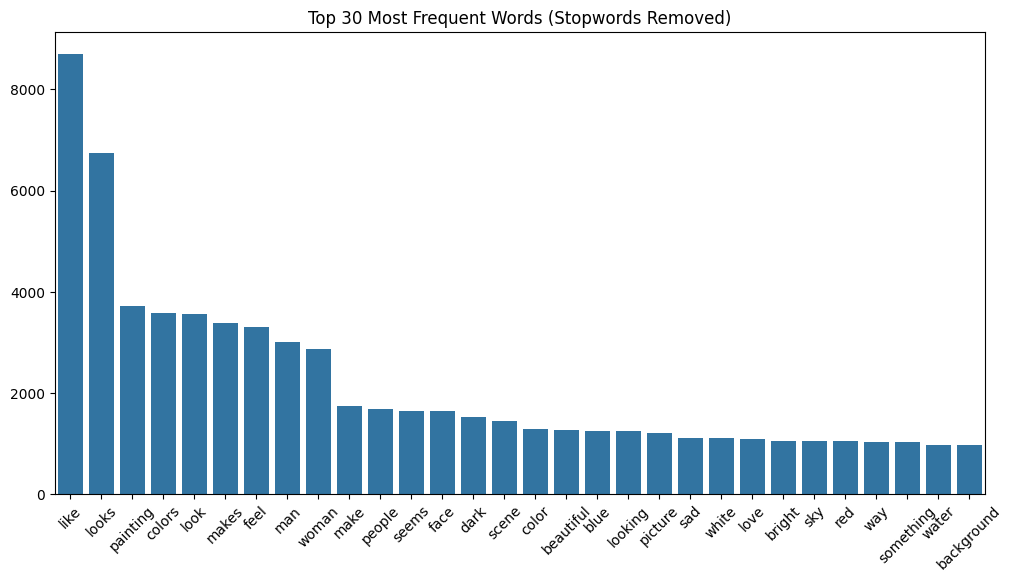

In [11]:
#plotting most freq words
words, counts = zip(*word_freq)

plt.figure(figsize=(12,6))
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=45)
plt.title("Top 30 Most Frequent Words (Stopwords Removed)")
plt.show()


In [12]:
#plotting bigrams 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X = vectorizer.fit_transform(df["utterance"])
sum_words = X.sum(axis=0)

bigrams = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
bigrams = sorted(bigrams, key=lambda x: x[1], reverse=True)[:20]

bigrams


[('looks like', np.int64(3630)),
 ('makes feel', np.int64(1232)),
 ('look like', np.int64(1031)),
 ('feel like', np.int64(445)),
 ('man looks', np.int64(445)),
 ('make feel', np.int64(396)),
 ('woman looks', np.int64(353)),
 ('makes think', np.int64(314)),
 ('painting makes', np.int64(293)),
 ('feels like', np.int64(288)),
 ('painting looks', np.int64(256)),
 ('bright colors', np.int64(240)),
 ('makes look', np.int64(232)),
 ('black white', np.int64(216)),
 ('dark colors', np.int64(198)),
 ('make look', np.int64(193)),
 ('facial expression', np.int64(184)),
 ('colors make', np.int64(181)),
 ('blue sky', np.int64(161)),
 ('feel content', np.int64(160))]

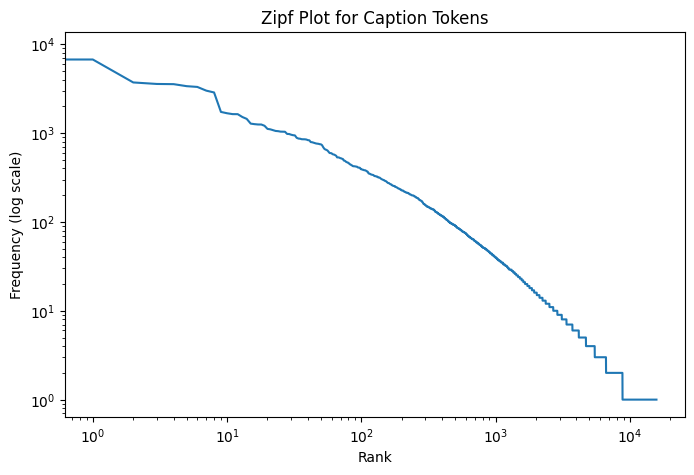

In [13]:
#freq counts
freq_counts = Counter(filtered_words)
sorted_freq = sorted(freq_counts.values(), reverse=True)

plt.figure(figsize=(8,5))
plt.plot(sorted_freq)
plt.yscale("log")
plt.xscale("log")
plt.title("Zipf Plot for Caption Tokens")
plt.xlabel("Rank")
plt.ylabel("Frequency (log scale)")
plt.show()


In [14]:
#repeates captions
unique_caps = df['utterance'].nunique()
total_caps = len(df)

print("Unique caption %:", unique_caps / total_caps * 100)
print("Most repeated captions:")
df['utterance'].value_counts().head(10)


Unique caption %: 99.9473945699506
Most repeated captions:


utterance
it is well shades,the combination of color is perfect ,the details is well shown  , it is neat and beautiful    3
the serene village makes me feel calm to me                                                                     3
People fighting                                                                                                 2
the light reflected in the water is relaxing                                                                    2
the painting has deep spiritual meaning                                                                         2
Pictures of nature make me feel relaxed.                                                                        2
the religious reverence of the figures                                                                          2
the figure looks at ease with herself                                                                           2
it creates a space where my melancholy and anxious feelings can be held       

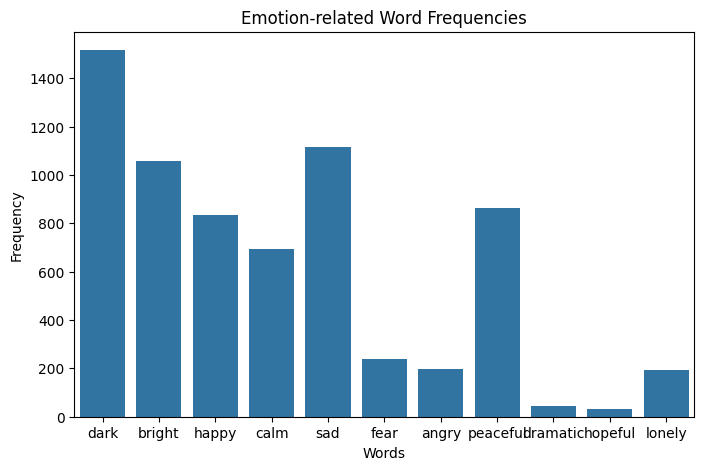

In [15]:
emotion_related = ["sad", "happy", "dark", "bright", "lonely", "calm", 
                   "peaceful", "angry", "fear", "hopeful", "dramatic"]

freq = Counter([w for w in all_words if w in emotion_related])
freq
plt.figure(figsize=(8,5))
sns.barplot(x=list(freq.keys()), y=list(freq.values()))
plt.title("Emotion-related Word Frequencies")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [16]:
from nltk import pos_tag
from collections import Counter

nltk.download("averaged_perceptron_tagger")
nltk.download("averaged_perceptron_tagger_eng")

# Optional: remove caption fillers
custom_stop = {
    "like", "looks", "look", "looking",
    "makes", "make", "seems", "something", "way"
}

def clean(tokens):
    return [w for w in tokens if w not in custom_stop]

adjectives = []

for tokens in df["tokens"]:
    cleaned = clean(tokens)
    tagged = pos_tag(cleaned)
    adjectives.extend([w for w, tag in tagged if tag.startswith("JJ")])

Counter(adjectives).most_common(50)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/manasvenkatasairavulapalli/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/manasvenkatasairavulapalli/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('i', 1164),
 ('beautiful', 1162),
 ('white', 1102),
 ('red', 974),
 ('bright', 969),
 ('black', 885),
 ('sad', 870),
 ('happy', 830),
 ('dark', 787),
 ('peaceful', 748),
 ('nice', 737),
 ('little', 735),
 ('green', 704),
 ('blue', 596),
 ('good', 568),
 ('other', 536),
 ('old', 491),
 ('great', 434),
 ('different', 408),
 ('calm', 407),
 ('young', 393),
 ('simple', 376),
 ('much', 369),
 ('scary', 345),
 ('small', 327),
 ('yellow', 323),
 ('many', 315),
 ('facial', 315),
 ('warm', 300),
 ('light', 298),
 ('large', 286),
 ('interesting', 285),
 ('long', 271),
 ('funny', 253),
 ('hard', 251),
 ('more', 251),
 ('realistic', 246),
 ('sure', 244),
 ('soft', 243),
 ('content', 242),
 ('bad', 233),
 ('naked', 225),
 ('real', 219),
 ('such', 218),
 ('detailed', 215),
 ('abstract', 215),
 ('colorful', 212),
 ('big', 211),
 ('dead', 202),
 ('full', 199)]

In [ ]:
#wEmotion Extraction

import nltk
from nltk import pos_tag
from collections import Counter
import requests

emotion_adjectives = []
all_tokens = []

for tokens in df["tokens"]:
    tagged = pos_tag(tokens)                           # POS tags
    emotion_adjectives.extend([w for w, t in tagged if t == "JJ"])  # JJ = adjective
    all_tokens.extend(tokens)

adj_freq = Counter(emotion_adjectives).most_common()
print("Top adjectives found in dataset:")
print(adj_freq[:30])

#NRC Emotion Lexicon for mapping adjectives to emotions
print("\nLoading NRC Emotion Lexicon...")
url = "https://raw.githubusercontent.com/words/an-emotion-lexicon/master/nrc_emotion_lexicon.txt"
lexicon_lines = requests.get(url).text.split("\n")

nrc_map = {}  # word -> list(emotions)
for line in lexicon_lines:
    parts = line.split()
    if len(parts) == 3 and parts[2] == "1":
        word, emotion = parts[0], parts[1]
        if word not in nrc_map:
            nrc_map[word] = []
        nrc_map[word].append(emotion)

dataset_adjs = set([w for w in emotion_adjectives])  # unique adjectives in dataset
EMOTION_DICT = {}

for w in dataset_adjs:
    if w in nrc_map:                 # if NRC recognizes emotional word
        # Take first dominant emotion only
        dominant_emotion = nrc_map[w][0]
        EMOTION_DICT[w] = dominant_emotion

print("\nAUTO-GENERATED EMOTION_DICT:")
print(EMOTION_DICT)



def extract_emotion(tokens):
    for t in tokens:
        if t in EMOTION_DICT:
            return f"<emotion_{EMOTION_DICT[t]}>"
    return "<emotion_none>"

df["emotion_tag"] = df["tokens"].apply(extract_emotion)
print("\nEmotion tag distribution in your dataset:")
print(df["emotion_tag"].value_counts())


Top adjectives found in dataset:
[('i', 1286), ('beautiful', 1190), ('white', 1102), ('sad', 1024), ('red', 988), ('bright', 986), ('black', 885), ('dark', 840), ('happy', 832), ('peaceful', 814), ('nice', 753), ('little', 735), ('green', 709), ('blue', 631), ('good', 573), ('other', 536), ('old', 491), ('calm', 437), ('great', 434), ('different', 408), ('young', 393), ('simple', 382), ('scary', 375), ('much', 371), ('yellow', 348), ('small', 327), ('content', 316), ('facial', 316), ('many', 315), ('light', 312)]

Loading NRC Emotion Lexicon...

AUTO-GENERATED EMOTION_DICT:
{}

Emotion tag distribution in your dataset:
emotion_tag
<emotion_none>    34217
Name: count, dtype: int64
